In [1]:
import pandas as pd

data = pd.read_csv("../data/2019_Yellow_Taxi_Trip_Data.csv")
data.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


In [2]:
data.rename(columns={
    'tpep_pickup_datetime':'pickup_time',
    'tpep_dropoff_datetime':'dropoff_time',
}, inplace=True)

data['pickup_time'] = pd.to_datetime(data['pickup_time'])
data['dropoff_time'] = pd.to_datetime(data['dropoff_time'])

data.head()

,vendorid,pickup_time,dropoff_time,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23 16:08:44,2019-10-23 16:21:11,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23 16:22:44,2019-10-23 16:43:26,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23 16:45:11,2019-10-23 16:58:49,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


In [23]:
# Calculate trip duration in minutes
data['trip_duration'] = (data['dropoff_time'] - data['pickup_time']).dt.total_seconds() / 60
data[['pickup_time','dropoff_time','trip_distance','trip_duration','fare_amount','tip_amount','tolls_amount','total_amount']].\
    sort_values(by='trip_duration', ascending=False)


,pickup_time,dropoff_time,trip_distance,trip_duration,fare_amount,tip_amount,tolls_amount,total_amount
7576,2019-10-23 16:52:51,2019-10-24 16:51:44,3.75,1438.883333,17.5,0.00,0.0,21.80
6902,2019-10-23 16:51:42,2019-10-24 16:50:22,11.19,1438.666667,39.5,0.00,0.0,41.30
4975,2019-10-23 16:18:51,2019-10-24 16:17:30,0.70,1438.650000,7.0,0.00,0.0,11.30
6550,2019-10-23 16:49:36,2019-10-24 16:47:40,2.54,1438.066667,11.0,2.30,0.0,17.60
2585,2019-10-23 16:13:09,2019-10-24 16:11:08,3.67,1437.983333,28.0,6.46,0.0,38.76
...,...,...,...,...,...,...,...,...
6092,2019-10-23 16:30:16,2019-10-23 16:30:16,0.00,0.000000,2.5,0.00,0.0,4.30
9149,2019-10-23 17:01:09,2019-10-23 17:01:09,0.00,0.000000,2.5,0.00,0.0,6.80
9315,2019-10-23 17:49:37,2019-10-23 17:49:37,0.00,0.000000,2.5,0.00,0.0,6.80
9314,2019-10-23 17:49:36,2019-10-23 17:49:36,0.00,0.000000,2.5,0.00,0.0,6.80


In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plot the distribution of trip durations
# plt.figure(figsize=(12, 5))
# sns.histplot(data['trip_duration'], bins=100, kde=True)
# plt.xlabel('Trip Duration (minutes)')
# plt.ylabel('Frequency')
# plt.title('Distribution of Trip Durations')
# plt.xlim(0, data['trip_duration'].quantile(0.99))  # Limit x-axis to the 99th percentile
# plt.show()

In [30]:
# Extract hour from pickup_time
data['pickup_hour'] = data['pickup_time'].dt.hour

# Categorize time of day
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
data['time_of_day'] = pd.cut(data['pickup_hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# Analyze trip duration by time of day
duration_by_time_of_day = data.groupby('time_of_day', observed=False)['trip_duration'].describe()
data['trip_duration'].fillna(0)
duration_by_time_of_day

,count,mean,std,min,25%,50%,75%,max
time_of_day,,,,,,,,
Night,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Morning,13.0,128.234615,388.775674,0.083333,3.533333,13.716667,45.000000,1420.383333
Afternoon,9984.0,22.884176,73.798439,0.000000,7.883333,13.500000,22.916667,1438.883333
Evening,3.0,6.411111,1.423448,4.883333,5.766667,6.650000,7.175000,7.700000


In [31]:
data['pickup_hour']

0       16
1       16
2       16
3       16
4       16
        ..
9995    17
9996    17
9997    17
9998    17
9999    17
Name: pickup_hour, Length: 10000, dtype: int32

                 trip_duration  trip_distance  fare_amount  passenger_count
trip_duration         1.000000       0.226590     0.227893         0.009785
trip_distance         0.226590       1.000000     0.873491         0.017702
fare_amount           0.227893       0.873491     1.000000         0.016931
passenger_count       0.009785       0.017702     0.016931         1.000000


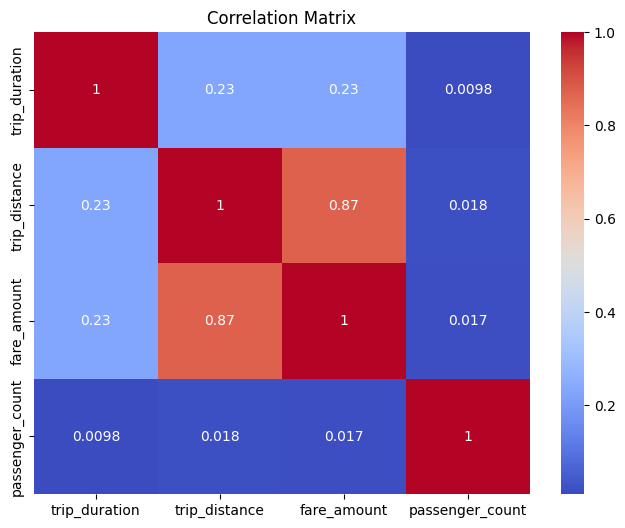

In [33]:
# Calculate correlations
correlations = data[['trip_duration', 'trip_distance', 'fare_amount', 'passenger_count']].corr()

print(correlations)

# Visualize correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()